In [27]:
from tensorflow import keras
from tensorflow.keras import layers, activations, utils, optimizers, losses, metrics

In [2]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation=activations.relu)(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=activations.relu)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation=activations.softmax)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

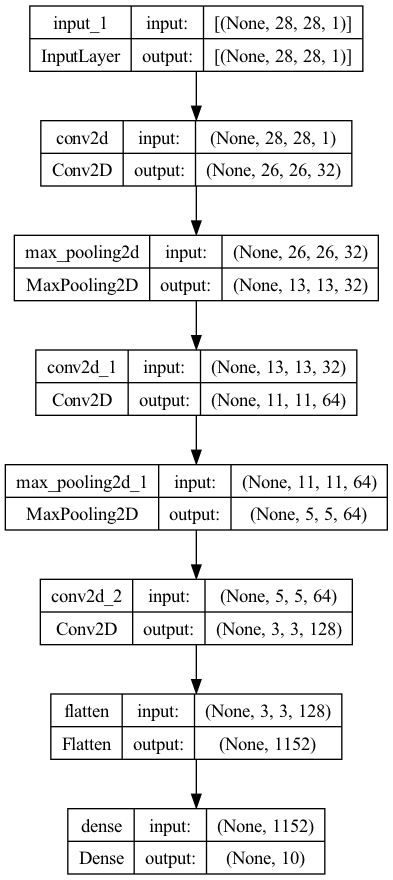

In [4]:
utils.plot_model(model, show_shapes=True)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
import numpy as np
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype(np.float32) / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype(np.float32) / 255

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=[metrics.SparseCategoricalAccuracy()])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 1s 0us/step


Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1549 - sparse_categorical_accuracy: 0.9517
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0442 - sparse_categorical_accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0308 - sparse_categorical_accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0237 - sparse_categorical_accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0188 - sparse_categorical_accuracy: 0.9943


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0365 - sparse_categorical_accuracy: 0.9890
Test accuracy: 0.9890000224113464


In [18]:
import os, shutil, pathlib

In [21]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        filenames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        for filename in filenames:
            shutil.copyfile(src=original_dir / filename, dst=dir / filename)\

make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

In [10]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1/255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation=activations.sigmoid)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
data batch shape (32, 180, 180, 3)
labels batch shape (32,)
1


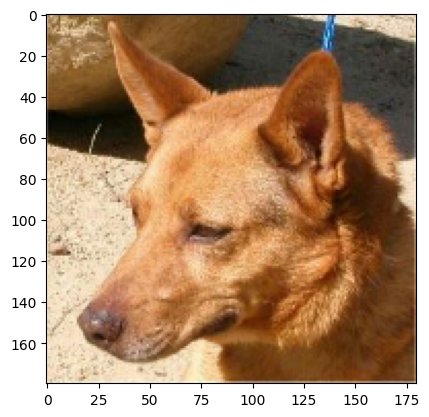

In [22]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=(180, 180),
    batch_size=32
)

import matplotlib.pyplot as plt
for data_batch, labels_batch in train_dataset:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    print(labels_batch[0].numpy())
    plt.imshow(data_batch[0].numpy().astype(np.uint8))
    break



In [21]:
import numpy as np
import tensorflow as tf

random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break



(16,)
(16,)
(16,)
(32, 16)
(32, 16)
(32, 16)
(4, 4)
(4, 4)
(4, 4)


In [50]:
from keras import callbacks

callbacks = [
    callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.6976 - binary_accuracy: 0.5255INFO:tensorflow:Assets written to: convnet_from_scratch/assets


INFO:tensorflow:Assets written to: convnet_from_scratch/assets


63/63 [==============================] - 19s 297ms/step - loss: 0.6976 - binary_accuracy: 0.5255 - val_loss: 0.6922 - val_binary_accuracy: 0.5030
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.6903 - binary_accuracy: 0.5425INFO:tensorflow:Assets written to: convnet_from_scratch/assets


INFO:tensorflow:Assets written to: convnet_from_scratch/assets


63/63 [==============================] - 18s 291ms/step - loss: 0.6903 - binary_accuracy: 0.5425 - val_loss: 0.6787 - val_binary_accuracy: 0.5370
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6761 - binary_accuracy: 0.5790INFO:tensorflow:Assets written to: convnet_from_scratch/assets


INFO:tensorflow:Assets written to: convnet_from_scratch/assets


63/63 [==============================] - 18s 292ms/step - loss: 0.6761 - binary_accuracy: 0.5790 - val_loss: 0.6457 - val_binary_accuracy: 0.6420
Epoch 4/30
63/63 [==============================] - 18s 292ms/step - loss: 0.6478 - binary_accuracy: 0.6155 - val_loss: 0.6704 - val_binary_accuracy: 0.6050
Epoch 5/30
63/63 [==============================] - 19s 294ms/step - loss: 0.6279 - binary_accuracy: 0.6575 - val_loss: 0.6583 - val_binary_accuracy: 0.5730
Epoch 6/30
63/63 [==============================] - 18s 290ms/step - loss: 0.5780 - binary_accuracy: 0.6975 - val_loss: 0.7263 - val_binary_accuracy: 0.5600
Epoch 7/30
63/63 [==============================] - 18s 291ms/step - loss: 0.5525 - binary_accuracy: 0.7255 - val_loss: 0.6480 - val_binary_accuracy: 0.6680
Epoch 8/30
63/63 [==============================] - ETA: 0s - loss: 0.5409 - binary_accuracy: 0.7430INFO:tensorflow:Assets written to: convnet_from_scratch/assets


INFO:tensorflow:Assets written to: convnet_from_scratch/assets


63/63 [==============================] - 19s 295ms/step - loss: 0.5409 - binary_accuracy: 0.7430 - val_loss: 0.5609 - val_binary_accuracy: 0.7040
Epoch 9/30
63/63 [==============================] - 18s 288ms/step - loss: 0.4806 - binary_accuracy: 0.7780 - val_loss: 0.5803 - val_binary_accuracy: 0.7030
Epoch 10/30
63/63 [==============================] - 18s 291ms/step - loss: 0.4411 - binary_accuracy: 0.7980 - val_loss: 0.5764 - val_binary_accuracy: 0.7230
Epoch 11/30
63/63 [==============================] - 18s 291ms/step - loss: 0.3917 - binary_accuracy: 0.8290 - val_loss: 0.6325 - val_binary_accuracy: 0.7050
Epoch 12/30
63/63 [==============================] - 18s 288ms/step - loss: 0.3641 - binary_accuracy: 0.8415 - val_loss: 0.6921 - val_binary_accuracy: 0.6780
Epoch 13/30
63/63 [==============================] - 18s 286ms/step - loss: 0.3021 - binary_accuracy: 0.8580 - val_loss: 0.6466 - val_binary_accuracy: 0.7190
Epoch 14/30
63/63 [==============================] - 18s 284ms/st

<Figure size 640x480 with 0 Axes>

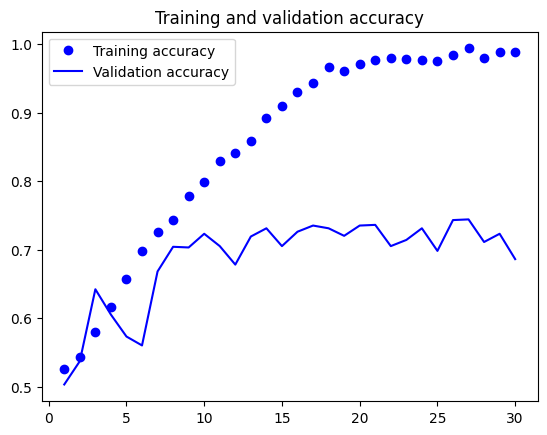

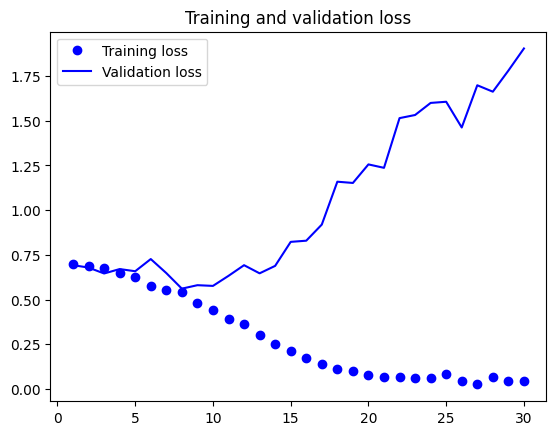

<Figure size 640x480 with 0 Axes>

In [57]:
accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [59]:
test_model = keras.models.load_model('convnet_from_scratch')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 4s 69ms/step - loss: 0.5787 - binary_accuracy: 0.7085
Test accuracy: 0.709


(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)


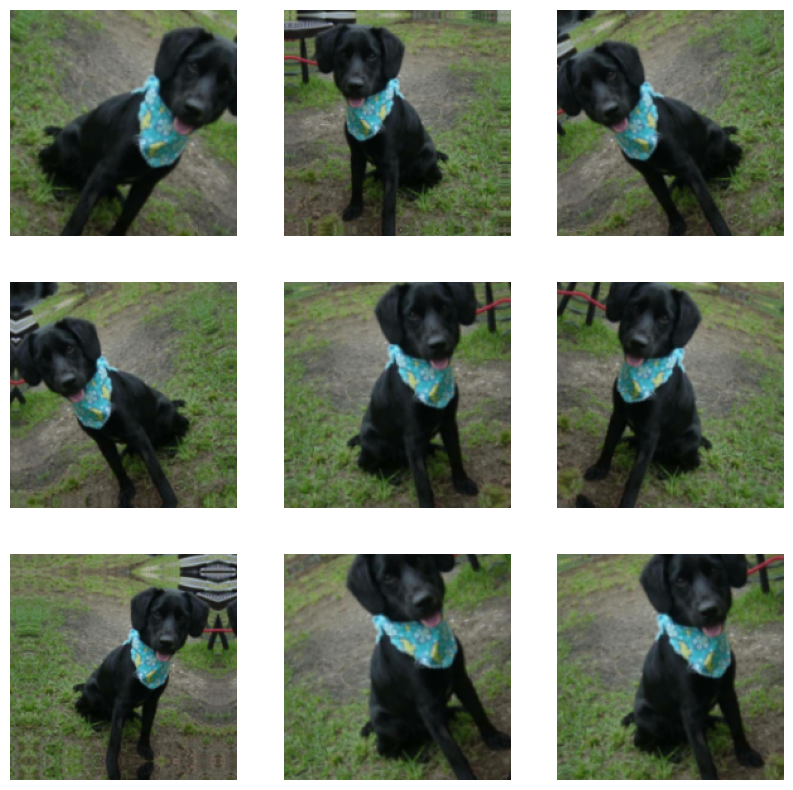

In [63]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    print(images.shape)
    for i in range(9):
        augmented_images = data_augmentation(images)
        print(augmented_images.shape)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype(np.uint8))
        plt.axis('off')

In [64]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1/255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=activations.relu)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation=activations.sigmoid)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.BinaryAccuracy()])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

In [66]:
from keras import callbacks
callbacks = [
    callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch_with_augmentation',
        save_best_only=True,
        monitor='val_loss'
    )
]

history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 0.7080 - binary_accuracy: 0.4935INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation/assets


63/63 [==============================] - 19s 297ms/step - loss: 0.7080 - binary_accuracy: 0.4935 - val_loss: 0.6898 - val_binary_accuracy: 0.6060
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 0.6905 - binary_accuracy: 0.5460

In [10]:
from keras import applications

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

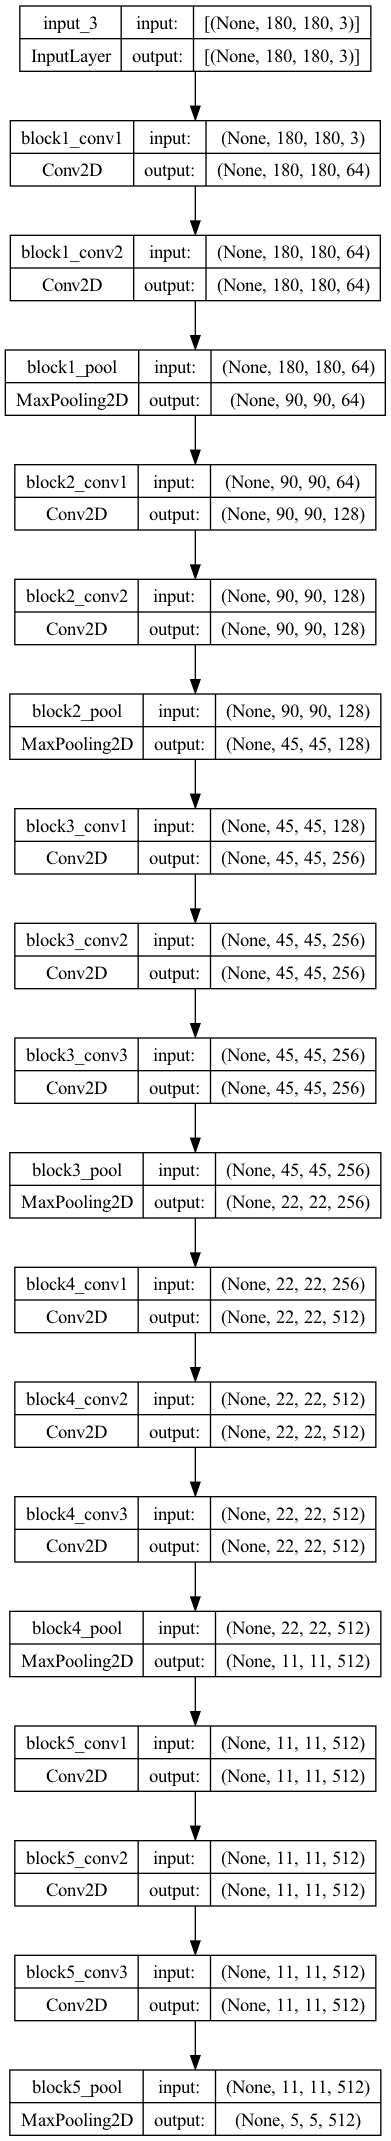

In [12]:
utils.plot_model(conv_base, show_shapes=True)

In [13]:
import numpy as np

In [26]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

for x in train_dataset:
    print(x)
    y, z = x
    print(y.shape)
    print(z.shape)
    break

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[ 60.85278   ,  42.85278   ,  28.852777  ],
         [ 53.033333  ,  35.033333  ,  21.033333  ],
         [ 52.63889   ,  34.63889   ,  20.63889   ],
         ...,
         [102.81946   , 103.81946   ,  97.81946   ],
         [102.        , 103.        ,  97.        ],
         [102.        , 103.        ,  97.        ]],

        [[ 60.85278   ,  42.85278   ,  28.852777  ],
         [ 53.033333  ,  35.033333  ,  21.033333  ],
         [ 53.301273  ,  35.301273  ,  21.301273  ],
         ...,
         [102.81946   , 103.81946   ,  97.81946   ],
         [102.        , 103.        ,  97.        ],
         [102.        , 103.        ,  97.        ]],

        [[ 60.85278   ,  42.85278   ,  28.852777  ],
         [ 53.36794   ,  35.36794   ,  21.367939  ],
         [ 53.58121   ,  35.58121   ,  21.581211  ],
         ...,
         [102.94233   , 103.94233   ,  97.94233   ],
         [102.33461   , 103.33461   ,  97.3346

In [ ]:
inputs = layers.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation=activations.sigmoid)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile()